# Ames Housing Data
## Supervised Machine Learning Regression Project

In this project the real estate sales price is of interest. Linear machine learning regression algorithms will be tested to identify the best suited one for this very feature rich dataset. As a result, data driven intelligente business desicions are expected to be deduced, to predict sale prices of upcoming houses by means of their features.

Original dataset: https://www.kaggle.com/ahmedmohameddawoud/ames-housing-data

Please note, follow the link for a description of the feature labels and abbreviations, to better understand the dataset. Alternatively, go to the very end of this notebook for an equivalent representation of the feature description.

In [801]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [802]:
df = pd.read_csv('../Data/Ames_Housing_Data.csv')

In [803]:
# make copy of original data
data = df.copy()

In [804]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Exploratory Data Analysis
UPDATE
First, the dataset will be explored and checked for any missing data. Potential missing data will have to be dealed with. Either way, getting acquinted with the data by visualzing them and identifying classifying features is ov the essence here.

In [805]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

From this table it is clear that some features have a lot of missing data points. Before any regression can be performed, those missing data have to be dealt with. In order to do this in the best possible way for someone without domain knowledge, it is important to get aquinted with the data by exploring and visualizing them first.

The PID feature is an arbitrary number without any value for the sales price prediction, hence it will be dropped.
The dataset also shows categorical features which also have to be transformed before any regression task.

In [807]:
df = df.drop('PID', axis=1)

In [808]:
# find the most correlated features to the prediction target 'SalePrice'
df.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0.706780
Overall Qual       0

Little surprising, the overall quality and sice of the living area of the property are the most important features that correlate positively with the sales price.

Let's explore a bit features which are thought to be of importance by human intuition.

In [809]:
interesting_features = ['Lot Area','Neighborhood','House Style','Gr Liv Area','Kitchen Qual',
                        'Year Built','Bldg Type','Garage Cars','Overall Qual','Overall Cond',
                        'Full Bath','Bedroom AbvGr','SalePrice']

In [810]:
df['House Style'].unique()

array(['1Story', '2Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '1.5Unf',
       '2.5Fin'], dtype=object)

In [811]:
df['Bldg Type'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

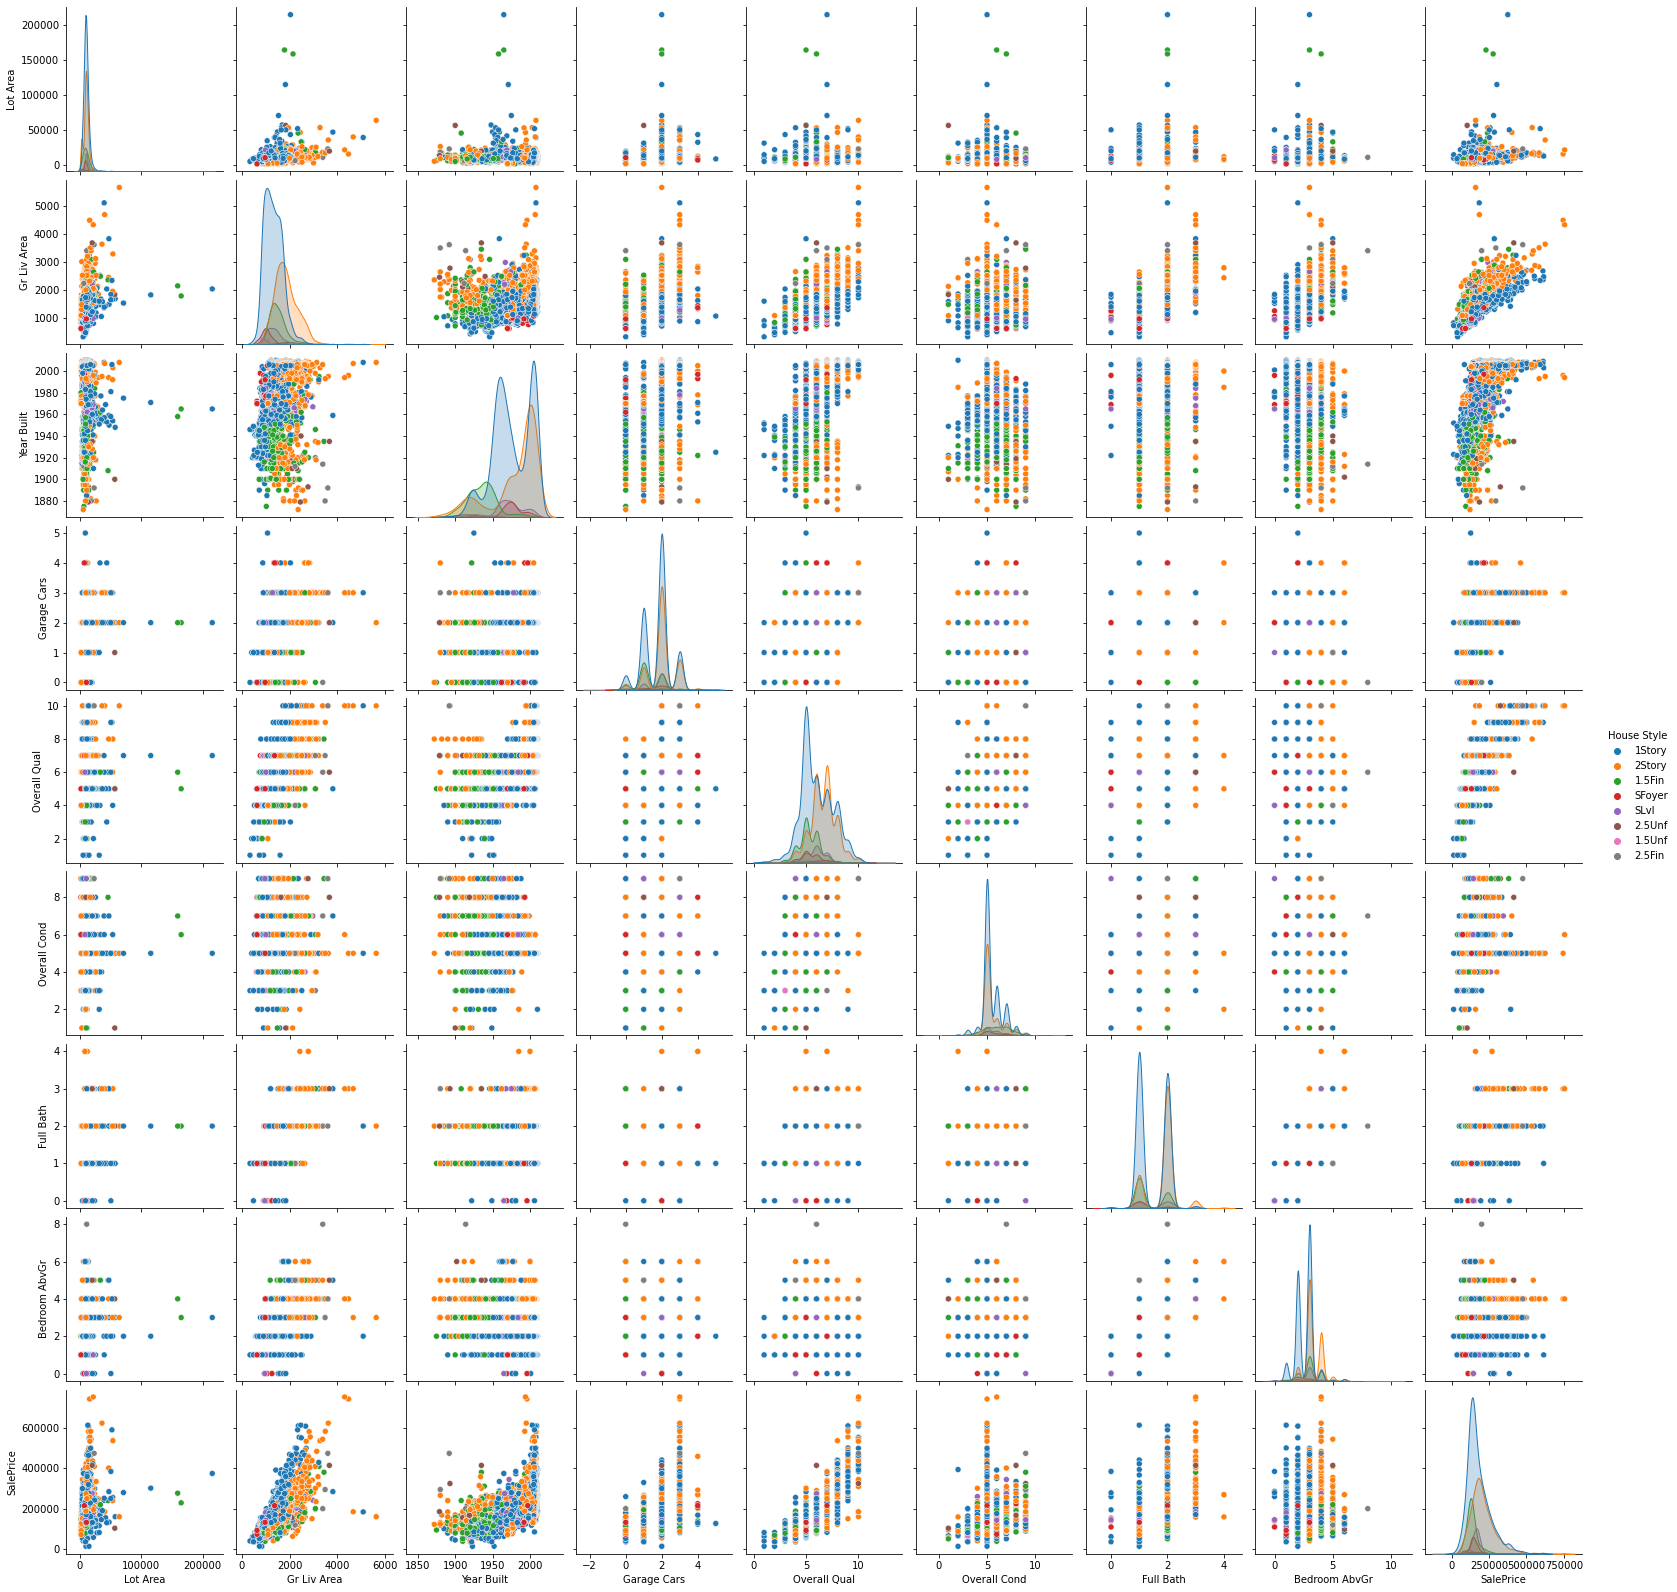

In [812]:
# exploring some important features on the sales price visually. Colorcode represents the house style.
sns.pairplot(data=df[interesting_features],hue='House Style')

As already seen in the correlation values for the sales price, the living area and overall quality have the clearest impact on the sales price. There is a drastic increase in sales price towards the higher end for houses built after the year 2000, which eludes from being described by a linear relationship. Also the overall quality seems have a contribution which might originate more from a quadratic polynomial dependence than a linear one.

<AxesSubplot:xlabel='Yr Sold', ylabel='SalePrice'>

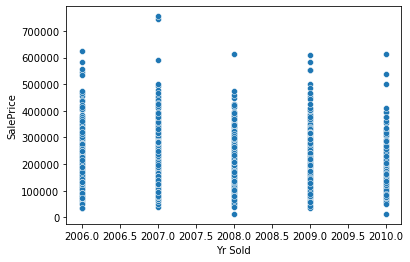

In [813]:
sns.scatterplot(data=df, x='Yr Sold', y='SalePrice')

In [814]:
type(df['Yr Sold'][0])

numpy.int64

In [815]:
df['Yr Sold'].unique()

array([2010, 2009, 2008, 2007, 2006])

In [816]:
df.groupby('Yr Sold')['SalePrice'].mean()

Yr Sold
2006    181761.648000
2007    185138.207493
2008    178841.750804
2009    181404.567901
2010    172597.598240
Name: SalePrice, dtype: float64

Due to the financial crisis, housing prices broke in after 2008 compared to the years before, despite a general trend of increasing sale prices the later they were sold.

This crisis was an extraordinar event impacting the housing market and should be given special consideration. There are only data for the years 20006 to 2010 and the datatype is int. This suggests an ordering of the years. In this case, this is not beneficial. Since there are only five different years, we'll transform this feature later into a categorical feature.

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

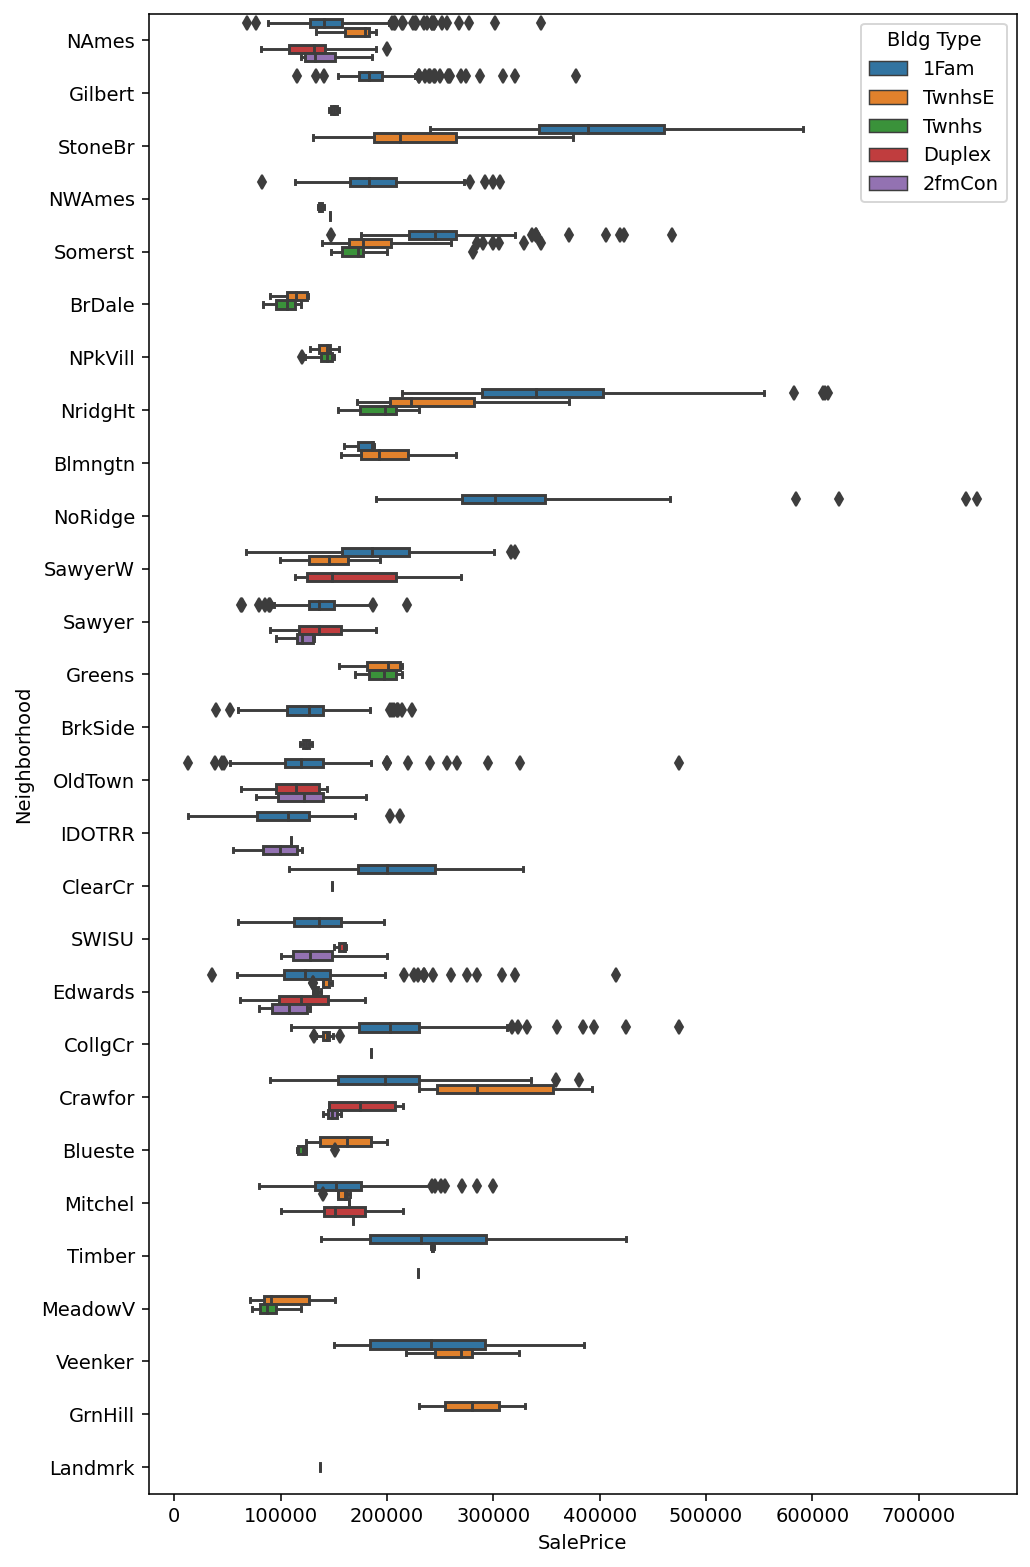

In [817]:
plt.figure(figsize=(8,14),dpi=140)
sns.boxplot(y='Neighborhood',x='SalePrice',data=df, hue='Bldg Type',orient='h')

Text(0.5, 1.0, 'Sales Price Histogram')

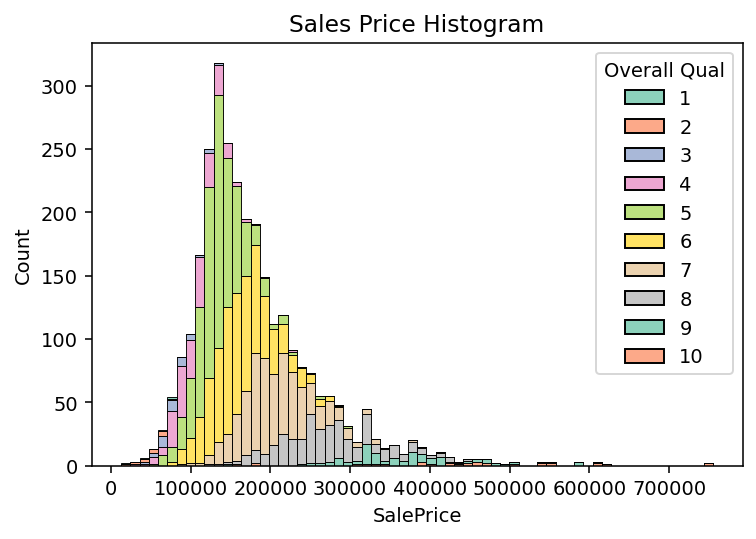

In [818]:
plt.figure(dpi=140)
sns.histplot(data=df, x='SalePrice',hue='Overall Qual',multiple='stack',palette='Set2')
plt.title('Sales Price Histogram')

The sale price is skewed towards high prices with only a few extreme outliers.

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

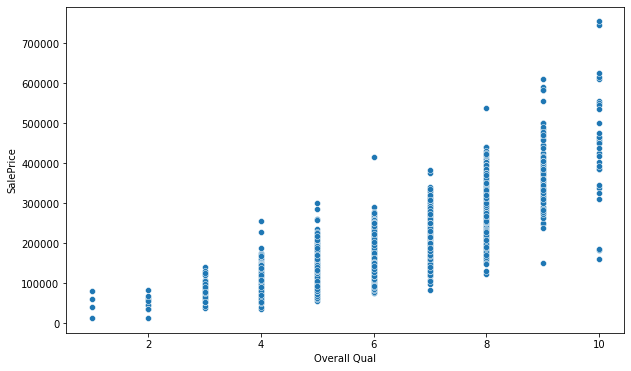

In [819]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

The 'Overall Qual' feature is an integer rating from 1 to 10. There are also a few outliers of very high overall quality, but very low sale prices. The outliers at the higher price end are more reasonable, since great mansons can sell at very high prices. Let's explore the other important feature (living area).

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

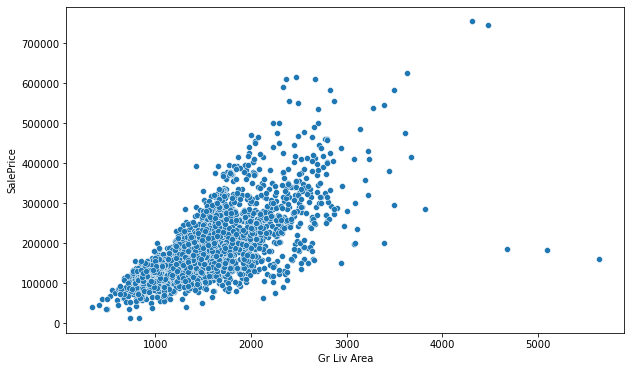

In [820]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

It seems like the same three outliers are displayed here as well, this time as properties with very high living areas but very low sale prices relative to it. Let's see if the suspision is correct.

In [821]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [822]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


There are three samples which are clear outliers. Since we want to predict the sales price via linear regression, those outliers would mess up any linear model, hence in order to improve the overall quality of the model, those outliers should be removed from the dataset.

In [823]:
drop_index = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

In [824]:
df = df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

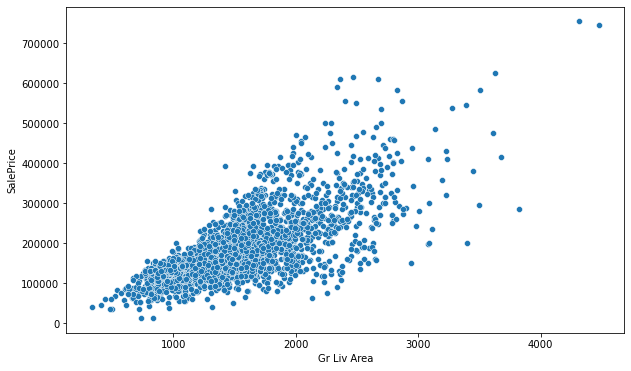

In [825]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [826]:
# find the ratio of missing data for each feature

def feature_percent_missing(df):
    '''
    Function that takes a DataFrame and outputs the percentage of missing data for features which have missing data in it.
    '''
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
 
    return percent_nan

In [827]:
percent_nan = feature_percent_missing(df)

In [828]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

### Handling of missing Data

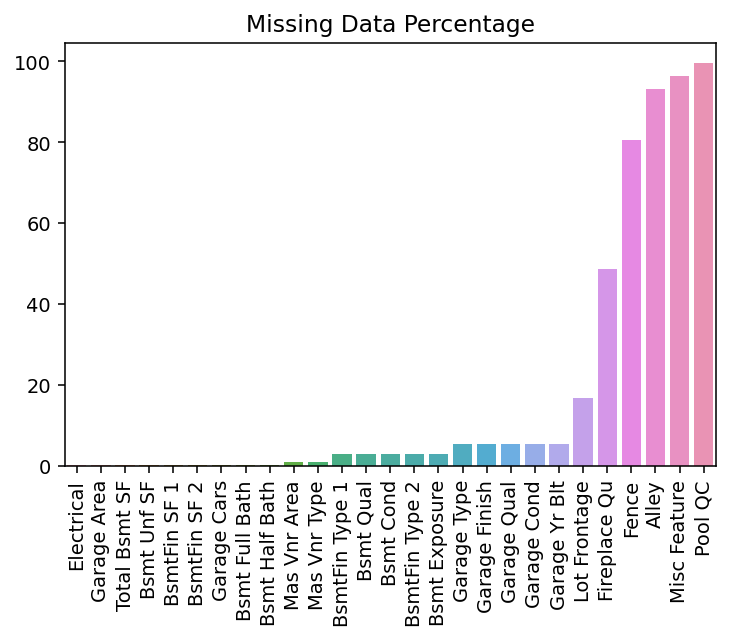

In [829]:
# displaying the percentage of missing data per feature

plt.figure(dpi=140)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.title('Missing Data Percentage')
plt.xticks(rotation=90);

There is a handful of features with only a small percentage of samples missing data. It is worth exploring those further in order to decide whether these values can be estimated or the rows have to be dropped. Dropping the feature is not an option, since only a few samples have missing data.

Let's zoom in on these features.

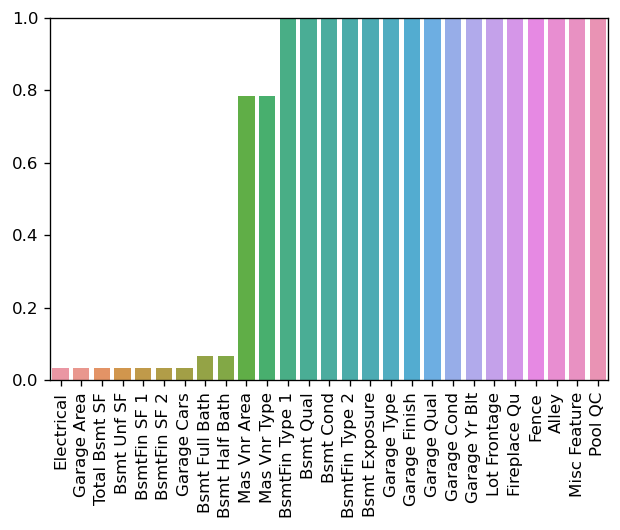

In [830]:
plt.figure(dpi=120)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,1)
plt.xticks(rotation=90);

The majority of features with very few missing data have to do with the garage and the basement. Maybe these are the same samples.

In [831]:
df[df['Garage Area'].isnull()].index

Int64Index([2236], dtype='int64')

In [832]:
df[df['Garage Cars'].isnull()].index

Int64Index([2236], dtype='int64')

In [833]:
df[df['Electrical'].isnull()].index

Int64Index([1577], dtype='int64')

Since for many of the features there is only one missing datapoint and the features of the missing datapoints belong to a similar categorie, let's drop these rows.

In [834]:
df = df.dropna(axis=0, subset=['Electrical','Garage Cars'])

In [835]:
# recalc percent_nan
percent_nan = feature_percent_missing(df)

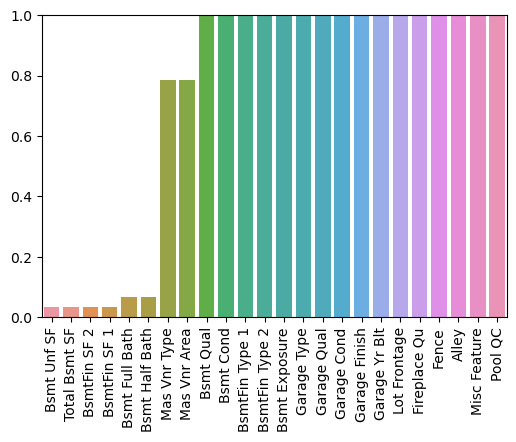

In [836]:
plt.figure(dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,1)
plt.xticks(rotation=90);

In [837]:
df[df['Bsmt Full Bath'].isnull()].index

Int64Index([1341, 1497], dtype='int64')

In [838]:
df[df['Bsmt Half Bath'].isnull()].index

Int64Index([1341, 1497], dtype='int64')

In [839]:
df[df['Bsmt Unf SF'].isnull()].index

Int64Index([1341], dtype='int64')

From the dataset description one can deduce, that a value of NA for the basements features means that the property does not have a basement. Instead of dropping those rows, let's convert theseNA into a 0 and a string for the numeric and string columns respectively.

In [840]:
# BSMT NUMERIC COLUMNS ---> fillna 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMT STRING COLUMNS
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [841]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [842]:
# recalc percent_nan
percent_nan = feature_percent_missing(df)

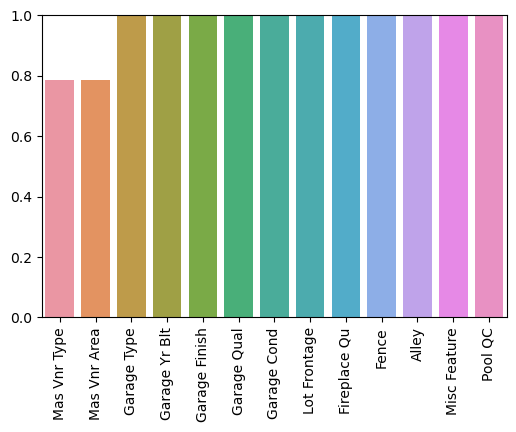

In [843]:
plt.figure(dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,1)
plt.xticks(rotation=90);

The masonry features have None values, however there are a few rows with no data. It is assumed here, that these data might be Nones. Instead of dropping these rows, the missing data will be replaced with None.

In [844]:
# Mas Vnr NUMERIC COLUMNS ---> fillna 0
mas_num_cols = ['Mas Vnr Area']

df[mas_num_cols] = df[mas_num_cols].fillna(0)

# Mas Vnr STRING COLUMNS
mas_str_cols =  ['Mas Vnr Type']

df[mas_str_cols] = df[mas_str_cols].fillna('None')

In [845]:
# recalc percent_nan
percent_nan = feature_percent_missing(df)

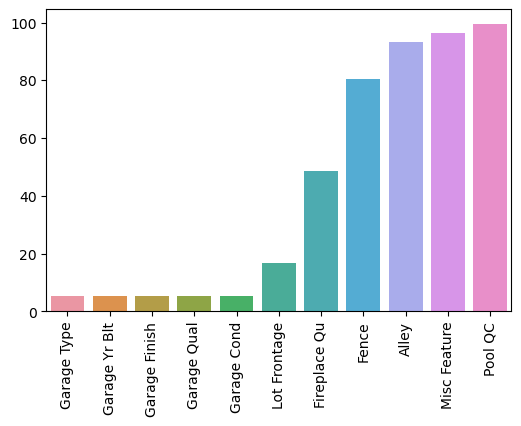

In [846]:
plt.figure(dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [847]:
df[df['Garage Type'].isnull()].index

Int64Index([  27,  119,  125,  129,  130,  170,  171,  186,  203,  206,
            ...
            2874, 2879, 2881, 2882, 2907, 2913, 2916, 2918, 2919, 2927],
           dtype='int64', length=157)

In [848]:
df[df['Garage Yr Blt'].isnull()].index

Int64Index([  27,  119,  125,  129,  130,  170,  171,  186,  203,  206,
            ...
            2874, 2879, 2881, 2882, 2907, 2913, 2916, 2918, 2919, 2927],
           dtype='int64', length=158)

In [849]:
df[df['Garage Finish'].isnull()].index

Int64Index([  27,  119,  125,  129,  130,  170,  171,  186,  203,  206,
            ...
            2874, 2879, 2881, 2882, 2907, 2913, 2916, 2918, 2919, 2927],
           dtype='int64', length=158)

In [850]:
df[df['Garage Qual'].isnull()].index

Int64Index([  27,  119,  125,  129,  130,  170,  171,  186,  203,  206,
            ...
            2874, 2879, 2881, 2882, 2907, 2913, 2916, 2918, 2919, 2927],
           dtype='int64', length=158)

In [851]:
df[df['Garage Cond'].isnull()].index

Int64Index([  27,  119,  125,  129,  130,  170,  171,  186,  203,  206,
            ...
            2874, 2879, 2881, 2882, 2907, 2913, 2916, 2918, 2919, 2927],
           dtype='int64', length=158)

In [852]:
df[df['Year Built'].isnull()].index

Int64Index([], dtype='int64')

It appears that all the missing garage related data belong to the same rows. With the help of the description it again can be assumed that there is no garage and for all the string features will be filled with 'None'. As for the numerical feature 'Garage Yr Blt', it is more tricky to set any arbitrary value. However, the dataset also contains a feature 'Year Built' for the house (without missing data), hence it will be assumed this value is also true for the garage.

In [853]:
# Garage NUMERIC COLUMNS ---> fillna with Year Built
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])

# Garage STRING COLUMNS
gar_str_cols =  ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

df[gar_str_cols] = df[gar_str_cols].fillna('None')

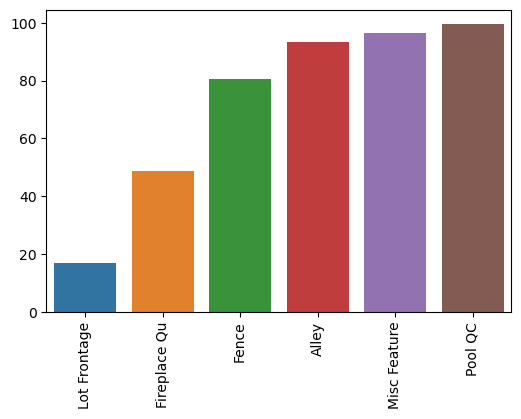

In [854]:
# recalc percent_nan
percent_nan = feature_percent_missing(df)

plt.figure(dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

For the remaining missing data of features Fireplace Qu, Fence, Alley, Misc Feature, Pool QC it is stated in the description, that there is a None option for the item missing. Again it will be assumed, that a missing value is probably because the property does not have the item.

In [855]:
# Garage STRING COLUMNS
str_cols =  ['Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 'Pool QC']

df[str_cols] = df[str_cols].fillna('None')

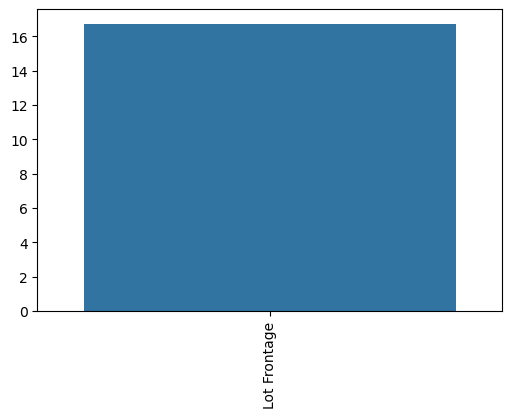

In [856]:
# recalc percent_nan
percent_nan = feature_percent_missing(df)

plt.figure(dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

For the last feature with missing data, the length of the property connected to a street will be assumed to be more or less similar for properties in the same neighborhood, hence filling the missing data with the average lot frontage for the particular neighborhood is performed.

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

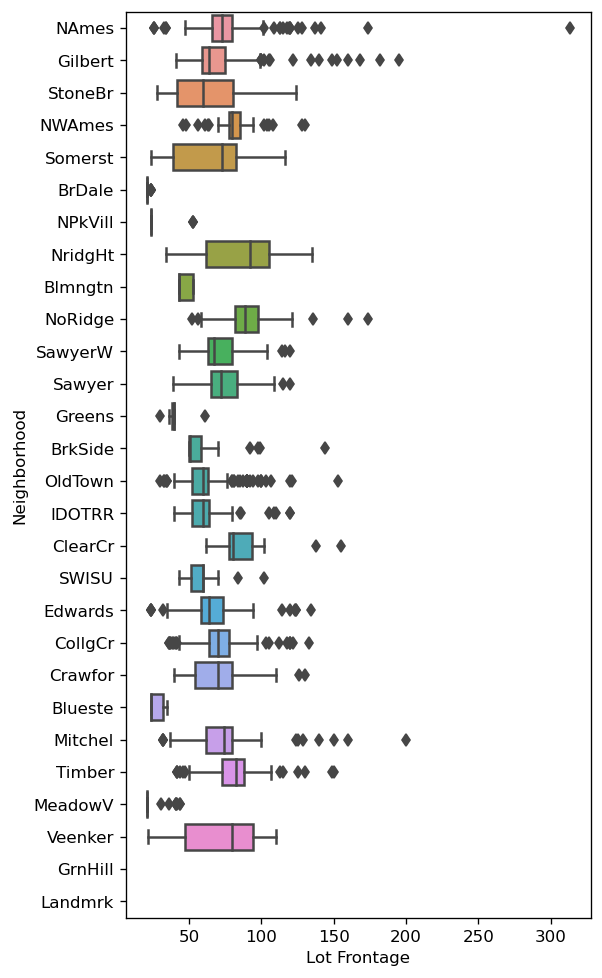

In [857]:
plt.figure(figsize=(5,10),dpi=120)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h')

In [858]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

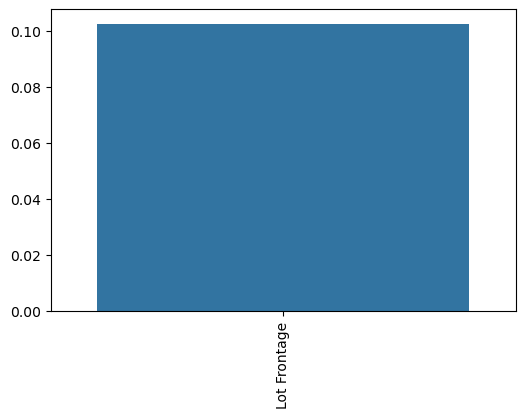

In [859]:
# recalc percent_nan
percent_nan = feature_percent_missing(df)

plt.figure(dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [860]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

For the remaining missing data in 'Lot Frontage' it will be assumed, that the property is of quadratic shape with the area of 'Lot Area' and one side of it is connected to a street. Both values are in units of feet.

In [861]:
# Lot Frontage NUMERIC COLUMNS ---> fillna with sqrt(Lot Area)
df['Lot Frontage'] = df['Lot Frontage'].fillna(np.sqrt(df['Lot Area']))

In [862]:
# recalc percent_nan
percent_nan = feature_percent_missing(df)
percent_nan

Series([], dtype: float64)

#### Removing Bias

In the feature 'Sale Condition' there are categories which are highly suspicious to introduce bias into the sales price prediction. First to mention is 'Family', which means the property was sold between family members, hence it is very unlikely the sales price was equivalent with the acutal market price. In order to confirm this suspicion, the mean squar-foot price is calculated in dependence of the sales condition.

In [863]:
df['SFPrice'] = df['SalePrice']/df['Lot Area']

In [864]:
df['SFPriceLiv'] = df['SalePrice']/df['Gr Liv Area']

In [865]:
df['SFPrice'].head()

0     6.767391
1     9.034590
2    12.055793
3    21.863799
4    13.731020
Name: SFPrice, dtype: float64

In [866]:
df.groupby('Sale Condition')['SFPrice'].mean()

Sale Condition
Abnorml    17.203206
AdjLand    14.535669
Alloca     16.088328
Family     16.418222
Normal     21.367374
Partial    28.736581
Name: SFPrice, dtype: float64

In [867]:
df.groupby('Sale Condition')['SFPriceLiv'].mean()

Sale Condition
Abnorml    100.637023
AdjLand     88.827711
Alloca     103.917798
Family     108.689284
Normal     120.200720
Partial    155.421571
Name: SFPriceLiv, dtype: float64

In [868]:
df['Sale Condition'].value_counts()

Normal     2412
Partial     242
Abnorml     190
Family       46
Alloca       23
AdjLand      12
Name: Sale Condition, dtype: int64

The mean sale price for properties sold to another family member is significantly lower than the normal sale price. In additon, those properties are no part of the free housing market and therefore introduce a bias, compromising the predictive capacity of a model having those included and only 1.56% of the samples fall in this category, hence they will be dropped.

'Abnorml' is another interesting category. The name already suggests that it is abnormal and might be worth dropping. In 'Abnorml', sale conditions such as foreclosures are included. However, in order to set a starting price, a prediction value might be of interest. And there is a strong difference between properties with large ratio of living area to lot area and those with a small ratio. Interestingly, a small ratio (large lot area compared to living area) is of much more desire here. Probably because of investors looking for looking for land where they still can build something new. Because the sale condition should be known for a property whose value should be predicted, the 'Abnorml' category will remain in the DataFrame.

In [869]:
df = df.drop(df[df['Sale Condition'] == 'Family'].index, axis=0)

The new created square-foot prices, even though when interesting, will be dropped again, since they are directly related to the target feature 'SalePrice'.

In [870]:
df = df.drop(['SFPrice','SFPriceLiv'], axis=1)

### Feature Engineering

The Ames Housing dataset is a very feature heavy dataset. Most likely, not all of them are of relevanze when it comes to predicting the properties sale price. Therefore it is convenient to use LASSO regression to reduce the feature set. In the pairplot earlier it became also clear that important features such as the building year shows strong non-linear dependencies. Since it is such a feature heavy dataset, it is not practical to use polynomial regression to cover these non-linear behaviors. There might also be cross-correlations between features, which would be covered via polynomial regression, but since it won't be used here, additional features will be engineered in this section which covers clear non-linear features as well as two two other features:

1. It might be possible that houses with very high quality and built resently achieved over-proportional high sale prices.
2. How the house in question ranks compared to other houses from the same neighborhood.

In order to make these transformations easy accessible for a new sample whose sale price should be predicted and hence the new features needed, these transformations will be done by generalized functions.

In [871]:
# make a copy of the dataframe before adding new features
df_eng = df.copy()

In [872]:
# creating a new feature, combining overall quality and the year the estate was built
def year_qual(sample_df):
    sample_df['Qual_Year'] = sample_df['Overall Qual'] * sample_df['Year Built']

In [873]:
year_qual(df_eng)

In [874]:
# adding a polynomial feature of 2nd degree for overall quality
def overall_qual_squared(sample_df):
    sample_df['Overall_Qual_Squared'] = sample_df['Overall Qual']**2

In [875]:
# adding a polynomial feature of 2nd degree for year built
def year_built_squared(sample_df):
    sample_df['Year_Built_Squared'] = sample_df['Year Built']**2

In [876]:
# adding a feature that ranks the property relative to the other houses of the neighborhood
def neighborhood_rank(sample_df):
    
    neighborhood_gb = sample_df.groupby('Neighborhood')['Overall Qual']
    
    # create means and standard deviations for each observation
    neighborhood_mean = neighborhood_gb.transform(lambda x: x.mean())
    neighborhood_std = neighborhood_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    new_feature = (sample_df['Overall Qual'] - neighborhood_mean) / neighborhood_std 
    sample_df['Neighborhood_Rel_Qual'] = new_feature
    
    # in case a neighborhood consits of only one sample, hence doesn't have any std, the new value would be NaN.
    # setting NaNs to 1
    # Lot Frontage NUMERIC COLUMNS ---> fillna with sqrt(Lot Area)
    sample_df['Neighborhood_Rel_Qual'] = sample_df['Neighborhood_Rel_Qual'].fillna(1)

In [877]:
overall_qual_squared(df_eng)

year_built_squared(df_eng)

neighborhood_rank(df_eng)

In [878]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 0 to 2929
Data columns (total 84 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MS SubClass            2879 non-null   int64  
 1   MS Zoning              2879 non-null   object 
 2   Lot Frontage           2879 non-null   float64
 3   Lot Area               2879 non-null   int64  
 4   Street                 2879 non-null   object 
 5   Alley                  2879 non-null   object 
 6   Lot Shape              2879 non-null   object 
 7   Land Contour           2879 non-null   object 
 8   Utilities              2879 non-null   object 
 9   Lot Config             2879 non-null   object 
 10  Land Slope             2879 non-null   object 
 11  Neighborhood           2879 non-null   object 
 12  Condition 1            2879 non-null   object 
 13  Condition 2            2879 non-null   object 
 14  Bldg Type              2879 non-null   object 
 15  Hous

### Categorical Features - Dummy Variables

While the feature 'MS SubClass' being numeric, it is still problematic for a regression task, because the numeric values imply an ordering, but in fact are of categorical nature. 

In [879]:
df_eng['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2879, dtype: int64

In [880]:
# conferting the int feature into strings (object), since it is of categorical nature
df_eng['MS SubClass'] = df_eng['MS SubClass'].apply(str)

In [881]:
# as already discussed before, the year sold feature will be converted into an object type
df_eng['Yr Sold'] = df_eng['Yr Sold'].apply(str)

In [882]:
# split the DataFrame into categorical and numerical features
object_df_eng = df_eng.select_dtypes(include='object')
numeric_df_eng = df_eng.select_dtypes(exclude='object')

In [883]:
# convert the categorical features into dummy variables and dropping the first variable in order to reduce redundant information
object_df_eng_dummies = pd.get_dummies(object_df_eng, drop_first=True)

In [884]:
#object_df_eng_dummies.head()

In [885]:
# combine the numeric and dummy dfs into a final df
final_df_eng = pd.concat([numeric_df_eng, object_df_eng_dummies], axis=1)

In [886]:
percent_nan = feature_percent_missing(final_df_eng)
percent_nan

Series([], dtype: float64)

In [887]:
final_df_eng.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,0,1,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,0,1,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,0,1,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,1,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,0,1,0,0,1,0


## Linear Regression
### ElasticNetCV

Let's finally start the regression. As already mentioned before, due to its feature heavy dataset, a reduction of this richess is most likely desirable, hence the an ElasticNet crossvalidation will be performed, hence allowing for feature coefficients being set to zero if they do not add much predictive value.


In [888]:
# first, importing all the necessary libraries
from sklearn.model_selection import train_test_split

In [889]:
from sklearn.preprocessing import StandardScaler

In [890]:
from sklearn.linear_model import ElasticNetCV

In [891]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Train | Test Split and Scaling
Since the dataset is quite large and a 5-fold cross validation will be performed, a final hold-out test set of 10% will be splitt off. This regression task also requires a scaling of all the data.

In [892]:
X = final_df_eng.drop('SalePrice', axis=1)

In [893]:
y = final_df_eng['SalePrice']

In [894]:
# X and y _test are a final hold-out test set
# Cross-validation is performed within the training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [895]:
scaler = StandardScaler()

In [896]:
# only fitting the scaler to X_train to avoid data leakage from the test set
scaler.fit(X_train)

StandardScaler()

In [897]:
scaled_X_train = scaler.transform(X_train)

scaled_X_test = scaler.transform(X_test)

#### ElasticNetCV Model and Scores

Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!
For the parameter grid for the l1_ratio, eps, cv and n_aplhas, the by sklearn recommendet basic set will be used.

In [898]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], eps=1e-3, n_alphas=1000,
                             cv=5, max_iter=10000, tol=0.01)

In [899]:
elastic_model.fit(scaled_X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000,
             n_alphas=1000, tol=0.01)

In [900]:
elastic_model.l1_ratio_

1.0

In [901]:
elastic_model.alpha_

311.0971930441715

The fitted model uses a pure LASSO regression with a l1_ratio of 1.

In [902]:
# elastic_model.coef_.nonzero()

In [903]:
elastic_model.coef_[0]

467.84752813390907

In [904]:
elastic_model.n_features_in_

293

In [905]:
elastic_model.score(scaled_X_train,y_train)

0.9415035866558715

Controlling how the model performed for each validation test set:

In [906]:
from sklearn.linear_model import ElasticNet

In [907]:
found_elastic_model = ElasticNet(l1_ratio=elastic_model.l1_ratio_, alpha=elastic_model.alpha_,
                                 max_iter=10000, tol=0.01)

In [908]:
from sklearn.model_selection import cross_validate

In [909]:
scores = cross_validate(found_elastic_model,scaled_X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)

In [910]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_max_error
0,0.027840,0.000618,-14615.665833,-4.255020e+08,-136685.220192
1,0.027500,0.000590,-14508.951702,-4.660346e+08,-203852.522785
2,0.025878,0.000579,-15412.402855,-6.053792e+08,-170898.557135
3,0.026444,0.000550,-14216.794623,-5.294489e+08,-146783.903530
4,0.027618,0.000559,-14227.097403,-4.034186e+08,-118953.629252


The model's performance is homogenous over all validations sets.

#### Prediction, Metrics and Interpretation
Final test of the best fitted model on the hold-out test set.

In [911]:
y_pred = elastic_model.predict(scaled_X_test)

In [912]:
# mean absolute error
MAE = mean_absolute_error(y_test,y_pred)
MAE

14219.18628616795

In [913]:
# root mean squared error
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

19887.117141977375

In [914]:
# mean sale price
np.mean(final_df_eng['SalePrice'])

181188.2500868357

In [915]:
# relative RMSE to the mean sale price
rel_RMSE = 100 * RMSE / np.mean(final_df_eng['SalePrice'])
rel_RMSE

10.975941945709138

In [916]:
# R2 score
elastic_model.score(scaled_X_train,y_train)

0.9415035866558715

###### Metrics Results

The prediction achieved the following metrics:

**mean absolute error** = 14219 USD

**root mean square error** = 19887 USD

Which translates into a **relative uncertainty** of about 11% for the mean sale price.

$$\frac{100 \cdot \mbox{RMSE}}{\overline{\mbox{SalePrice}}} = 11\%$$

$$ \textbf{R}^\text{2}~~ \mbox{score} = 0.9415 $$ 

Investigating the features with the most predictive value:

In [917]:
col_index = elastic_model.coef_.nonzero()

In [918]:
df_final_features = final_df_eng.iloc[:,col_index[0]]

In [919]:
len(col_index[0])

162

Even with LASSO regression, the model still uses 162 from the initial 293 features.

**Residuals**

In [920]:
test_residuals = y_test - y_pred

<Figure size 1200x1080 with 0 Axes>

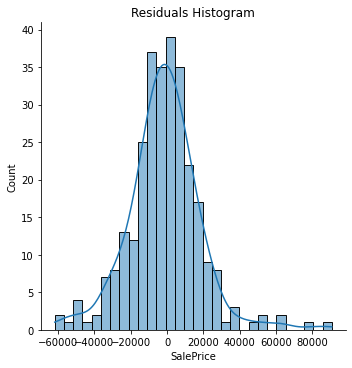

In [921]:
plt.figure(figsize=(10,9),dpi=120)
sns.displot(test_residuals, bins=30, kde=True)
plt.title('Residuals Histogram');

From the histogram the residuals appear to be close to normal distributed around 0, which is a good indication for the suitability of the model fitting the data. There are are a few samples with high residuals.


**Probability Plot:**

In [922]:
import scipy as sp

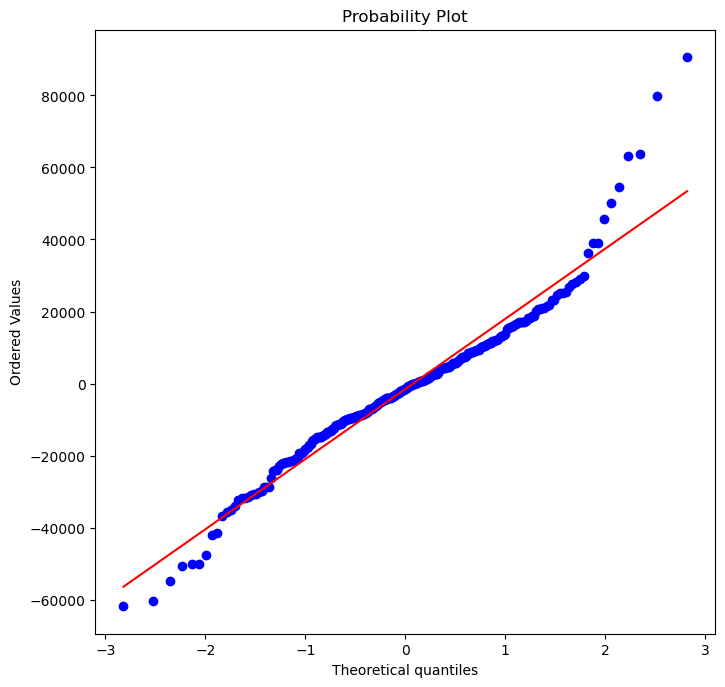

In [923]:
fig, ax = plt.subplots(figsize=(8,8),dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

The red line indicates what a perfect normal distribution would look like. In the inner quartile range of 25% - 75% the model performs decently well. On the lower end of the price range, it over-predicts the prices, while for the extreme upper price category it strongly underpredicts the prices.

### Final Model Training on Full Dataset for Deployment

In [924]:
full_model = ElasticNet(l1_ratio=elastic_model.l1_ratio_, alpha=elastic_model.alpha_,
                                 max_iter=10000, tol=0.01)

In [925]:
full_X = final_df_eng.drop('SalePrice', axis=1)
full_y = final_df_eng['SalePrice']

In [926]:
scaler.fit(full_X)

StandardScaler()

In [927]:
scaled_full_X = scaler.transform(full_X)

In [928]:
full_model.fit(scaled_full_X, full_y)

ElasticNet(alpha=311.0971930441715, l1_ratio=1.0, max_iter=10000, tol=0.01)

In [929]:
full_y_pred = full_model.predict(scaled_full_X)

In [930]:
full_model.score(scaled_full_X, full_y)

0.9410305056973911

**Feature Importance**

In [931]:
col_features = final_df_eng.columns
col_index = full_model.coef_.nonzero()
df_final_features = final_df_eng.iloc[:,col_index[0]]

In [932]:
final_cols = []
final_coefs = []

for i in col_index[0]:
    final_cols.append(col_features[i])
    final_coefs.append(full_model.coef_[i])

In [933]:
d = {'Feature':final_cols, 'Coefficient': final_coefs}

result_df = pd.DataFrame(d)

In [934]:
result_df.sort_values('Coefficient', inplace=True)

In [935]:
result_df.describe()

,Coefficient
count,167.000000
mean,471.588869
std,3418.760901
min,-6939.070555
25%,-468.250363
50%,5.644975
75%,758.923520
max,26209.661457


In [936]:
# just plot features whose absolute coef is greater than 4000
plot_df = result_df[np.abs(result_df['Coefficient']) > 4000]

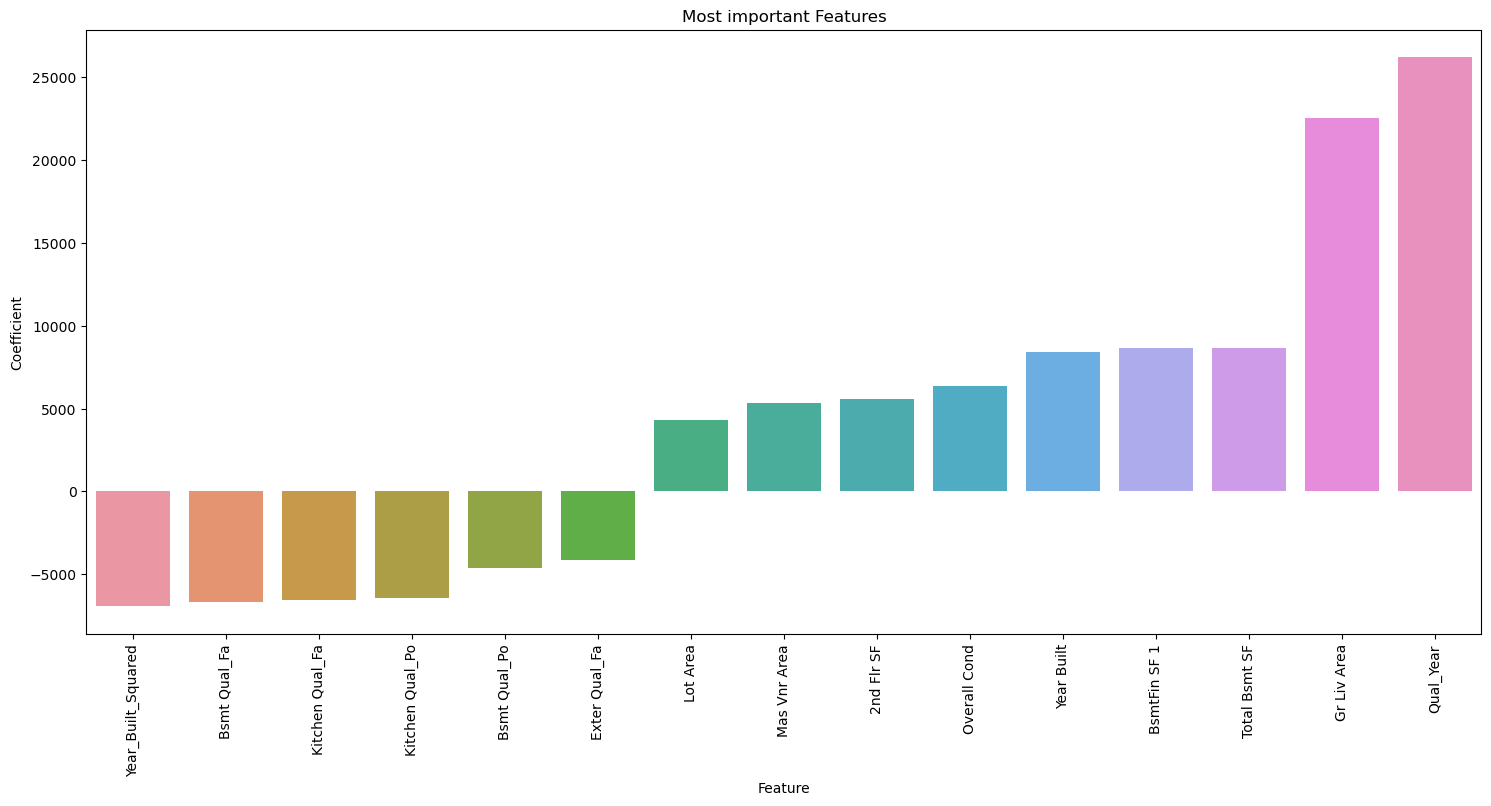

In [937]:
plt.figure(figsize=(18,8),dpi=100)
sns.barplot(data=plot_df, x='Feature', y='Coefficient', orient='v')
plt.title('Most important Features')
plt.xticks(rotation=90);

The by far most important features are living area and the engineered overall quality times year built. With 'Year_Built_Squared' is another engineered feature among the most important ones, as the most negatively correlated one.

In general, the size of the property, the quality and the year it was built are of great importance when it comes to the sale prices of real estates.

## Conclusion

Presented is a linear regression model to predict house sale prices for the Ames Housing dataset.
The model performes very good, just the extreme lower and higher price ends are over- and under-predicted respectively.

The final model used the following parameters:

`ElasticNet(alpha=311.0971930441715, l1_ratio=1.0, max_iter=10000, tol=0.01)`

##### Results

The prediction achieved the following metrics:

**mean absolute error** = 14219 USD

**root mean square error** = 19887 USD

Which translates into a **relative uncertainty** of about 11% for the mean sale price.

$$\frac{100 \cdot \mbox{RMSE}}{\overline{\mbox{SalePrice}}} = 11\%$$

$$ \textbf{R}^\text{2}~~ \mbox{score} = 0.941 $$ 

In [938]:
#from sklearn.metrics import SCORERS

In [939]:
#SCORERS.keys()

## Feature Description

MSSubClass: Identifies the type of dwelling involved in the sale.

`      20    1-STORY 1946 & NEWER ALL STYLES
    30    1-STORY 1945 & OLDER
    40    1-STORY W/FINISHED ATTIC ALL AGES
    45    1-1/2 STORY - UNFINISHED ALL AGES
    50    1-1/2 STORY FINISHED ALL AGES
    60    2-STORY 1946 & NEWER
    70    2-STORY 1945 & OLDER
    75    2-1/2 STORY ALL AGES
    80    SPLIT OR MULTI-LEVEL
    85    SPLIT FOYER
    90    DUPLEX - ALL STYLES AND AGES
   120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150    1-1/2 STORY PUD - ALL AGES
   160    2-STORY PUD - 1946 & NEWER
   180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190    2 FAMILY CONVERSION - ALL STYLES AND AGES`
   
MSZoning: Identifies the general zoning classification of the sale.

`   A    Agriculture
   C    Commercial
   FV    Floating Village Residential
   I    Industrial
   RH    Residential High Density
   RL    Residential Low Density
   RP    Residential Low Density Park 
   RM    Residential Medium Density`
   
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

`   Grvl    Gravel  
   Pave    Paved`
   
Alley: Type of alley access to property

`   Grvl    Gravel
   Pave    Paved
   NA     No alley access`
   
LotShape: General shape of property

`   Reg    Regular 
   IR1    Slightly irregular
   IR2    Moderately Irregular
   IR3    Irregular`
   
LandContour: Flatness of the property

`   Lvl    Near Flat/Level 
   Bnk    Banked - Quick and significant rise from street grade to building
   HLS    Hillside - Significant slope from side to side
   Low    Depression`
   
Utilities: Type of utilities available

`   AllPub    All public Utilities (E,G,W,& S)    
   NoSewr    Electricity, Gas, and Water (Septic Tank)
   NoSeWa    Electricity and Gas Only
   ELO    Electricity only  `
   
LotConfig: Lot configuration

`   Inside    Inside lot
   Corner    Corner lot
   CulDSac    Cul-de-sac
   FR2    Frontage on 2 sides of property
   FR3    Frontage on 3 sides of property`
   
LandSlope: Slope of property

`   Gtl    Gentle slope
   Mod    Moderate Slope  
   Sev    Severe Slope`
   
Neighborhood: Physical locations within Ames city limits

`   Blmngtn    Bloomington Heights
   Blueste    Bluestem
   BrDale    Briardale
   BrkSide    Brookside
   ClearCr    Clear Creek
   CollgCr    College Creek
   Crawfor    Crawford
   Edwards    Edwards
   Gilbert    Gilbert
   IDOTRR    Iowa DOT and Rail Road
   MeadowV    Meadow Village
   Mitchel    Mitchell
   Names    North Ames
   NoRidge    Northridge
   NPkVill    Northpark Villa
   NridgHt    Northridge Heights
   NWAmes    Northwest Ames
   OldTown    Old Town
   SWISU    South & West of Iowa State University
   Sawyer    Sawyer
   SawyerW    Sawyer West
   Somerst    Somerset
   StoneBr    Stone Brook
   Timber    Timberland
   Veenker    Veenker`
   
Condition1: Proximity to various conditions

`   Artery    Adjacent to arterial street
   Feedr    Adjacent to feeder street   
   Norm    Normal  
   RRNn    Within 200' of North-South Railroad
   RRAn    Adjacent to North-South Railroad
   PosN    Near positive off-site feature--park, greenbelt, etc.
   PosA    Adjacent to postive off-site feature
   RRNe    Within 200' of East-West Railroad
   RRAe    Adjacent to East-West Railroad`
   
Condition2: Proximity to various conditions (if more than one is present)

`   Artery    Adjacent to arterial street
   Feedr    Adjacent to feeder street   
   Norm    Normal  
   RRNn    Within 200' of North-South Railroad
   RRAn    Adjacent to North-South Railroad
   PosN    Near positive off-site feature--park, greenbelt, etc.
   PosA    Adjacent to postive off-site feature
   RRNe    Within 200' of East-West Railroad
   RRAe    Adjacent to East-West Railroad`
   
BldgType: Type of dwelling

`   1Fam    Single-family Detached  
   2FmCon    Two-family Conversion; originally built as one-family dwelling
   Duplx    Duplex
   TwnhsE    Townhouse End Unit
   TwnhsI    Townhouse Inside Unit`
   
HouseStyle: Style of dwelling

`   1Story    One story
   1.5Fin    One and one-half story: 2nd level finished
   1.5Unf    One and one-half story: 2nd level unfinished
   2Story    Two story
   2.5Fin    Two and one-half story: 2nd level finished
   2.5Unf    Two and one-half story: 2nd level unfinished
   SFoyer    Split Foyer
   SLvl    Split Level`
   
OverallQual: Rates the overall material and finish of the house

`   10    Very Excellent
   9    Excellent
   8    Very Good
   7    Good
   6    Above Average
   5    Average
   4    Below Average
   3    Fair
   2    Poor
   1    Very Poor
`

OverallCond: Rates the overall condition of the house

`   10    Very Excellent
   9    Excellent
   8    Very Good
   7    Good
   6    Above Average   
   5    Average
   4    Below Average   
   3    Fair
   2    Poor
   1    Very Poor`
   
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

`   Flat    Flat
   Gable    Gable
   Gambrel    Gabrel (Barn)
   Hip    Hip
   Mansard    Mansard
   Shed    Shed`
   
RoofMatl: Roof material

`   ClyTile    Clay or Tile
   CompShg    Standard (Composite) Shingle
   Membran    Membrane
   Metal    Metal
   Roll    Roll
   Tar&Grv    Gravel & Tar
   WdShake    Wood Shakes
   WdShngl    Wood Shingles`
   
Exterior1st: Exterior covering on house

`   AsbShng    Asbestos Shingles
   AsphShn    Asphalt Shingles
   BrkComm    Brick Common
   BrkFace    Brick Face
   CBlock    Cinder Block
   CemntBd    Cement Board
   HdBoard    Hard Board
   ImStucc    Imitation Stucco
   MetalSd    Metal Siding
   Other    Other
   Plywood    Plywood
   PreCast    PreCast 
   Stone    Stone
   Stucco    Stucco
   VinylSd    Vinyl Siding
   Wd Sdng    Wood Siding
   WdShing    Wood Shingles`
   
Exterior2nd: Exterior covering on house (if more than one material)

`   AsbShng    Asbestos Shingles
   AsphShn    Asphalt Shingles
   BrkComm    Brick Common
   BrkFace    Brick Face
   CBlock    Cinder Block
   CemntBd    Cement Board
   HdBoard    Hard Board
   ImStucc    Imitation Stucco
   MetalSd    Metal Siding
   Other    Other
   Plywood    Plywood
   PreCast    PreCast
   Stone    Stone
   Stucco    Stucco
   VinylSd    Vinyl Siding
   Wd Sdng    Wood Siding
   WdShing    Wood Shingles`
   
MasVnrType: Masonry veneer type

`   BrkCmn    Brick Common
   BrkFace    Brick Face
   CBlock    Cinder Block
   None    None
   Stone    Stone`
   
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

`   Ex    Excellent
   Gd    Good
   TA    Average/Typical
   Fa    Fair
   Po    Poor`
   
ExterCond: Evaluates the present condition of the material on the exterior

`   Ex    Excellent
   Gd    Good
   TA    Average/Typical
   Fa    Fair
   Po    Poor`
   
Foundation: Type of foundation

`   BrkTil    Brick & Tile
   CBlock    Cinder Block
   PConc    Poured Contrete 
   Slab    Slab
   Stone    Stone
   Wood    Wood`
   
BsmtQual: Evaluates the height of the basement

`   Ex    Excellent (100+ inches) 
   Gd    Good (90-99 inches)
   TA    Typical (80-89 inches)
   Fa    Fair (70-79 inches)
   Po    Poor (<70 inches
   NA    No Basement`
   
BsmtCond: Evaluates the general condition of the basement

`   Ex    Excellent
   Gd    Good
   TA    Typical - slight dampness allowed
   Fa    Fair - dampness or some cracking or settling
   Po    Poor - Severe cracking, settling, or wetness
   NA    No Basement`
   
BsmtExposure: Refers to walkout or garden level walls

`   Gd    Good Exposure
   Av    Average Exposure (split levels or foyers typically score average or above)  
   Mn    Mimimum Exposure
   No    No Exposure
   NA    No Basement`
   
BsmtFinType1: Rating of basement finished area

`   GLQ    Good Living Quarters
   ALQ    Average Living Quarters
   BLQ    Below Average Living Quarters   
   Rec    Average Rec Room
   LwQ    Low Quality
   Unf    Unfinshed
   NA    No Basement`
   
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

`   GLQ    Good Living Quarters
   ALQ    Average Living Quarters
   BLQ    Below Average Living Quarters   
   Rec    Average Rec Room
   LwQ    Low Quality
   Unf    Unfinshed
   NA    No Basement`
   
BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

`   Floor    Floor Furnace
   GasA    Gas forced warm air furnace
   GasW    Gas hot water or steam heat
   Grav    Gravity furnace 
   OthW    Hot water or steam heat other than gas
   Wall    Wall furnace`
   
HeatingQC: Heating quality and condition

`   Ex    Excellent
   Gd    Good
   TA    Average/Typical
   Fa    Fair
   Po    Poor`
   
CentralAir: Central air conditioning

`   N    No
   Y    Yes`
   
Electrical: Electrical system

`   SBrkr    Standard Circuit Breakers & Romex
   FuseA    Fuse Box over 60 AMP and all Romex wiring (Average) 
   FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
   FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
   Mix    Mixed`
   
1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

`   Ex    Excellent
   Gd    Good
   TA    Typical/Average
   Fa    Fair
   Po    Poor`
   
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

`   Typ    Typical Functionality
   Min1    Minor Deductions 1
   Min2    Minor Deductions 2
   Mod    Moderate Deductions
   Maj1    Major Deductions 1
   Maj2    Major Deductions 2
   Sev    Severely Damaged
   Sal    Salvage only`
   
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

`   Ex    Excellent - Exceptional Masonry Fireplace
   Gd    Good - Masonry Fireplace in main level
   TA    Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
   Fa    Fair - Prefabricated Fireplace in basement
   Po    Poor - Ben Franklin Stove
   NA    No Fireplace`
   
GarageType: Garage location

`   2Types    More than one type of garage
   Attchd    Attached to home
   Basment    Basement Garage
   BuiltIn    Built-In (Garage part of house - typically has room above garage)
   CarPort    Car Port
   Detchd    Detached from home
   NA    No Garage`
   
GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

`   Fin    Finished
   RFn    Rough Finished  
   Unf    Unfinished
   NA    No Garage`
   
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

`   Ex    Excellent
   Gd    Good
   TA    Typical/Average
   Fa    Fair
   Po    Poor
   NA    No Garage`
   
GarageCond: Garage condition

`   Ex    Excellent
   Gd    Good
   TA    Typical/Average
   Fa    Fair
   Po    Poor
   NA    No Garage`
   
PavedDrive: Paved driveway

`   Y    Paved 
   P    Partial Pavement
   N    Dirt/Gravel`
   
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

`   Ex    Excellent
   Gd    Good
   TA    Average/Typical
   Fa    Fair
   NA    No Pool`
   
Fence: Fence quality

`   GdPrv    Good Privacy
   MnPrv    Minimum Privacy
   GdWo    Good Wood
   MnWw    Minimum Wood/Wire
   NA    No Fence`
   
MiscFeature: Miscellaneous feature not covered in other categories

`   Elev    Elevator
   Gar2    2nd Garage (if not described in garage section)
   Othr    Other
   Shed    Shed (over 100 SF)
   TenC    Tennis Court
   NA    None`
   
MiscVal: Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

`  WD     Warranty Deed - Conventional
   CWD    Warranty Deed - Cash
   VWD    Warranty Deed - VA Loan
   New    Home just constructed and sold
   COD    Court Officer Deed/Estate
   Con    Contract 15percent Down payment regular terms
   ConLw    Contract Low Down payment and low interest
   ConLI    Contract Low Interest
   ConLD    Contract Low Down
   Oth    Other`
   
SaleCondition: Condition of sale

`   Normal    Normal Sale
   Abnorml    Abnormal Sale -  trade, foreclosure, short sale
   AdjLand    Adjoining Land Purchase
   Alloca    Allocation - two linked properties with separate deeds, typically condo with a garage unit  
   Family    Sale between family members
   Partial    Home was not completed when last assessed (associated with New Homes)`
   